Sometimes we need to keep outliers because in few use cases outliers play a crucial role. and few algorithm are not sensitive to outliers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
data = pd.read_csv('train_titanic.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


if the data is normally distributed we can use estimate outliers (extreme value analysis) 

In [99]:
data['Age'].describe()

count    714.000000
mean      29.688694
std       14.492933
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       73.278610
Name: Age, dtype: float64

<AxesSubplot:>

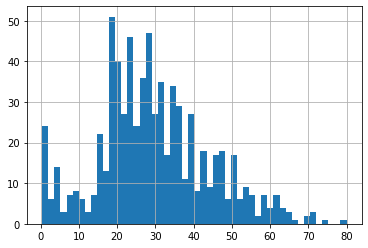

In [7]:
data['Age'].hist(bins = 50)

C:\Users\amals\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

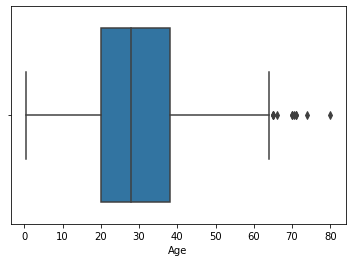

In [15]:
sns.boxplot(data['Age'])

Assuming that 'Age' is in gaussian distribution

In [116]:
#in gaussian distribution consider
upper_boundary = data['Age'].mean() + 3 * data['Age'].std()
lower_boundary = data['Age'].mean() - 3 * data['Age'].std()

In [117]:
print(lower_boundary)
print(upper_boundary)

-13.88037434994331
73.27860964406095


in the case of Age -ve value is not considered

In [118]:
outlier = []
for x in data['Age']:
    if x > upper_boundary:
        outlier.append(x)

In [119]:
outlier

[80.0, 74.0]

#### using z_score

In [70]:
def outlier_detection(data,feature):
    outlier = []
    mean = data[feature].mean()
    std = data[feature].std()
    thresh = 3
    for x in data[feature]:
        z_score = (x - mean)/std
        if z_score > thresh:
            outlier.append(x)
    return outlier

In [71]:
outlier_detection(data,'Age')

[80.0, 74.0]

In [109]:
data.loc[data['Age']>upper_boundary,"Age"] = upper_boundary

C:\Users\amals\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

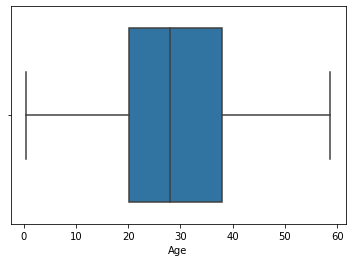

In [110]:
sns.boxplot(data['Age'])

#### considering skewed data

inorder to calculate extreme outlilers we nees to multiply iqr with 3

<AxesSubplot:>

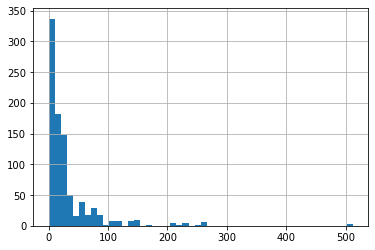

In [35]:
data['Fare'].hist(bins=50)

this data is right skewed

C:\Users\amals\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

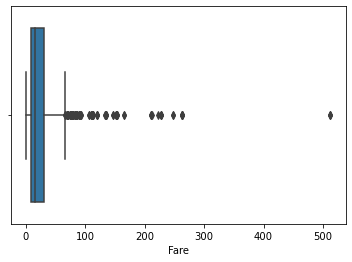

In [41]:
sns.boxplot(data['Fare'])

In [37]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [38]:
Q1 = 7.910400
Q3 = 31.000000

In [42]:
IQR = Q3 - Q1
IQR

23.0896

In [43]:
lbound = Q1 - (1.5*IQR)
ubound = Q3 + (1.5*IQR)

In [44]:
out = []
for i in data["Fare"]:
    if i > u_bound:
        out.append(i)
   

In [54]:
len(out)/len(data['Fare'])

0.11896745230078563

In [77]:
#extreme outlier
lbound_extreme = Q1 - (3*IQR)
ubound_extreme = Q3 + (3*IQR)
ubound_extreme

100.2688

In [50]:
extreme_out = []
for i in data["Fare"]:
    if i > ubound_extreme:
        extreme_out.append(i)

In [55]:
len(extreme_out)/len(data['Fare'])

0.05948372615039282

In [79]:
data

100.2688

In [88]:
data.loc[data['Fare']>ubound,'Fare'] = ubound

C:\Users\amals\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

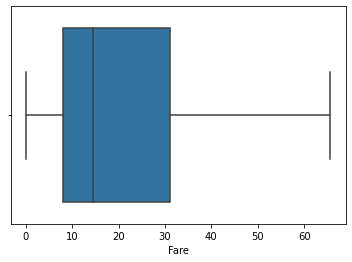

In [89]:
sns.boxplot(data['Fare'])

In [93]:
data.loc[data['Fare']>ubound_extreme,'Fare'] = ubound_extreme

C:\Users\amals\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

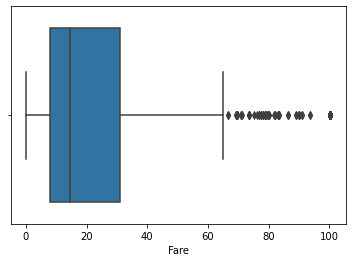

In [94]:
sns.boxplot(data['Fare'])